In [1]:
# Import Required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Reading the dataset

url = 'https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv'
df = pd.read_csv(url)

In [4]:
# Inspecting first 5 five rows

df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [5]:
# Inspecting the structure of the dataset

df.shape

(1453, 15)

In [6]:
# Checking for unique values

df.nunique()

yummy              2
convenient         2
spicy              2
fattening          2
greasy             2
fast               2
cheap              2
tasty              2
expensive          2
healthy            2
disgusting         2
Like              11
Age               54
VisitFrequency     6
Gender             2
dtype: int64

In [7]:
# Checking for duplicate values

df.duplicated().sum()

22

As we can see 22 rows are duplicated so we need to drop these rows.

In [9]:
df=df.drop_duplicates()

In [10]:
df.shape

(1431, 15)

In [11]:
# Summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1431 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1431 non-null   object
 1   convenient      1431 non-null   object
 2   spicy           1431 non-null   object
 3   fattening       1431 non-null   object
 4   greasy          1431 non-null   object
 5   fast            1431 non-null   object
 6   cheap           1431 non-null   object
 7   tasty           1431 non-null   object
 8   expensive       1431 non-null   object
 9   healthy         1431 non-null   object
 10  disgusting      1431 non-null   object
 11  Like            1431 non-null   object
 12  Age             1431 non-null   int64 
 13  VisitFrequency  1431 non-null   object
 14  Gender          1431 non-null   object
dtypes: int64(1), object(14)
memory usage: 178.9+ KB


In [12]:
# Checking for Missing values

df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

## Converting categorical values to numeric values 

In [13]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [14]:
# mapping categorical value 'yes' and 'no' to '1' and '0'
yes_to_no = {'Yes':1,'No':0}

cols = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
              
for col in cols:
              df[col] = df[col].map(yes_to_no).astype(int)

In [15]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1431 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1431 non-null   int64 
 1   convenient      1431 non-null   int64 
 2   spicy           1431 non-null   int64 
 3   fattening       1431 non-null   int64 
 4   greasy          1431 non-null   int64 
 5   fast            1431 non-null   int64 
 6   cheap           1431 non-null   int64 
 7   tasty           1431 non-null   int64 
 8   expensive       1431 non-null   int64 
 9   healthy         1431 non-null   int64 
 10  disgusting      1431 non-null   int64 
 11  Like            1431 non-null   object
 12  Age             1431 non-null   int64 
 13  VisitFrequency  1431 non-null   object
 14  Gender          1431 non-null   object
dtypes: int64(12), object(3)
memory usage: 178.9+ KB


In [17]:
df['Like'].value_counts()

+3              225
+2              180
0               168
+4              156
+1              152
I hate it!-5    150
I love it!+5    140
-3               73
-4               70
-2               59
-1               58
Name: Like, dtype: int64

In [18]:
# Rate mapping
like_map = {
    'I hate it!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '+1': 1,
    '+2': 2,
    '+3': 3,
    '+4': 4,
    'I love it!+5': 5}

df['Like']=df['Like'].map(like_map).astype(int)

In [19]:
df['Like'].value_counts()

 3    225
 2    180
 0    168
 4    156
 1    152
-5    150
 5    140
-3     73
-4     70
-2     59
-1     58
Name: Like, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1431 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1431 non-null   int64 
 1   convenient      1431 non-null   int64 
 2   spicy           1431 non-null   int64 
 3   fattening       1431 non-null   int64 
 4   greasy          1431 non-null   int64 
 5   fast            1431 non-null   int64 
 6   cheap           1431 non-null   int64 
 7   tasty           1431 non-null   int64 
 8   expensive       1431 non-null   int64 
 9   healthy         1431 non-null   int64 
 10  disgusting      1431 non-null   int64 
 11  Like            1431 non-null   int64 
 12  Age             1431 non-null   int64 
 13  VisitFrequency  1431 non-null   object
 14  Gender          1431 non-null   object
dtypes: int64(13), object(2)
memory usage: 178.9+ KB


In [21]:
# Gender mapping

gender_map = {'Female':1,'Male':0}

df['Gender'] = df['Gender'].map(gender_map)

In [22]:
df['Gender'].value_counts()

1    772
0    659
Name: Gender, dtype: int64

In [23]:
df['VisitFrequency'].value_counts()

Once a month             427
Every three months       339
Once a year              252
Once a week              232
Never                    128
More than once a week     53
Name: VisitFrequency, dtype: int64

## EDA

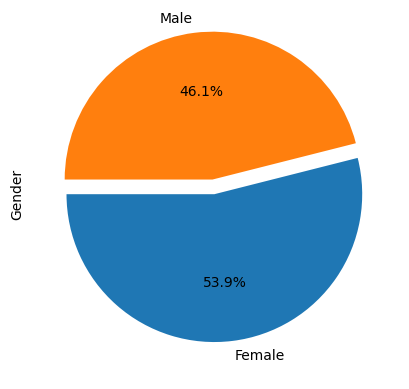

In [24]:
# Gender Distribution

df['Gender'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%',explode=[0,0.1],startangle=180,labels=['Female','Male'])
plt.show()

<Axes: >

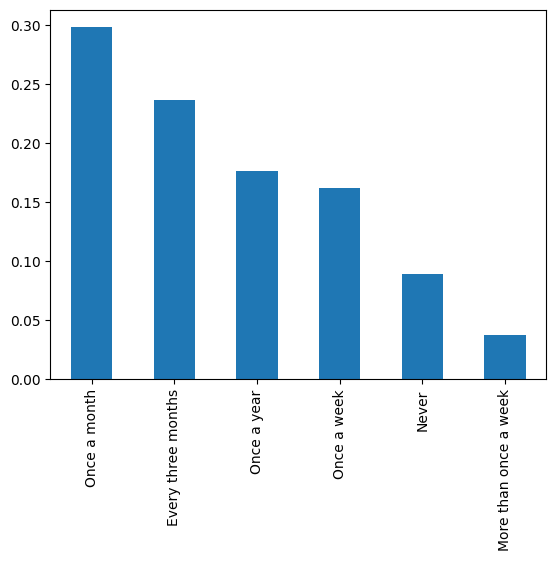

In [25]:
# 

df['VisitFrequency'].value_counts(normalize=True).plot.bar()

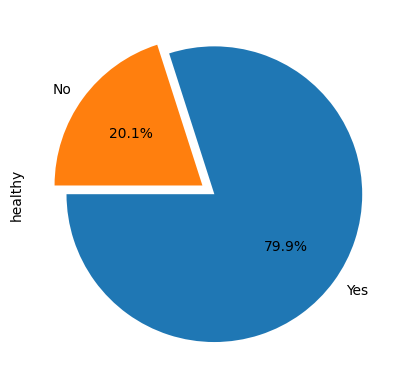

In [26]:
df['healthy'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%',explode=[0,0.1],startangle=180,labels=['Yes','No'])
plt.show()

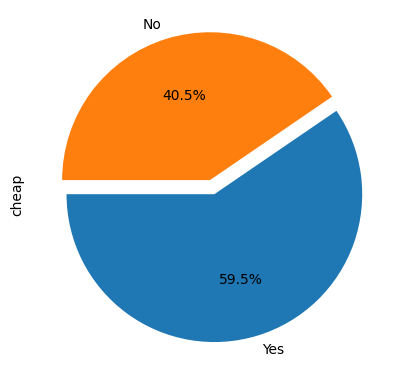

In [27]:
df['cheap'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%',explode=[0,0.1],startangle=180,labels=['Yes','No'])
plt.show()

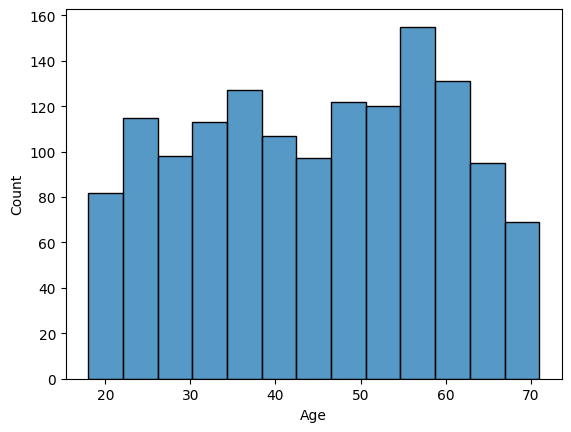

In [28]:
# Age distribution

sns.histplot(df['Age'])
plt.show()

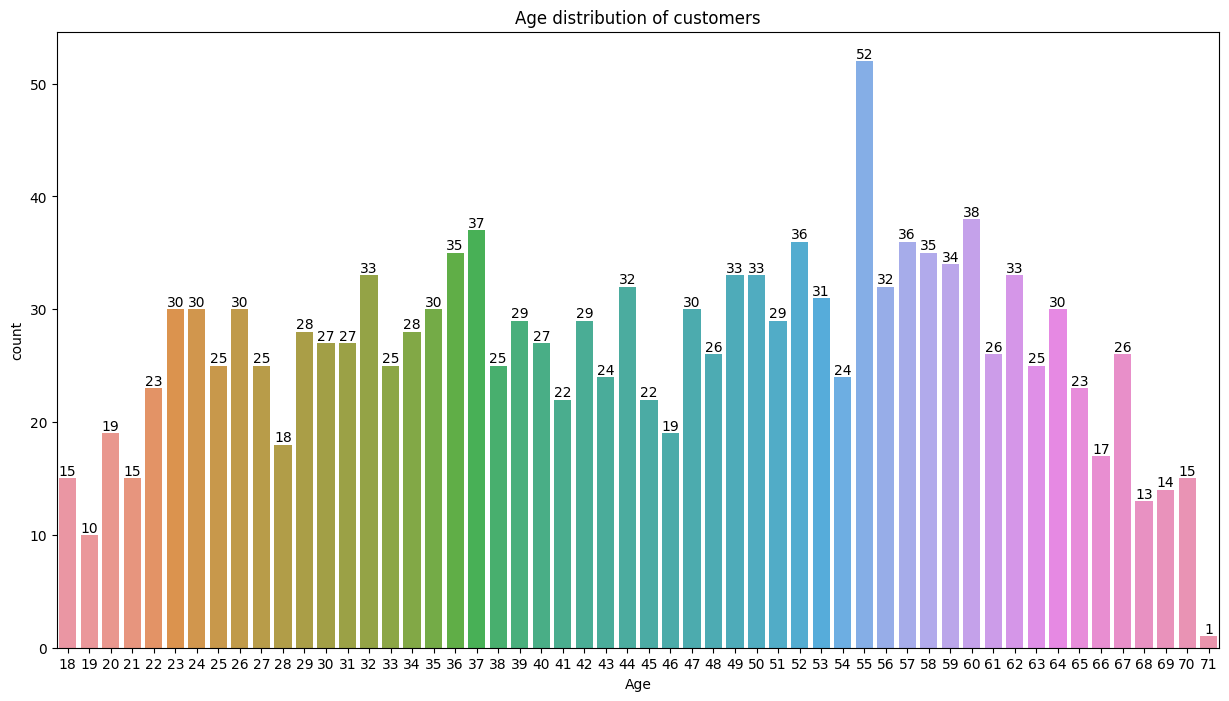

In [29]:
plt.figure(figsize=(15, 8))
age_plot = sns.countplot(x=df['Age'])
age_plot.bar_label(age_plot.containers[0])
plt.title('Age distribution of customers')
plt.show()

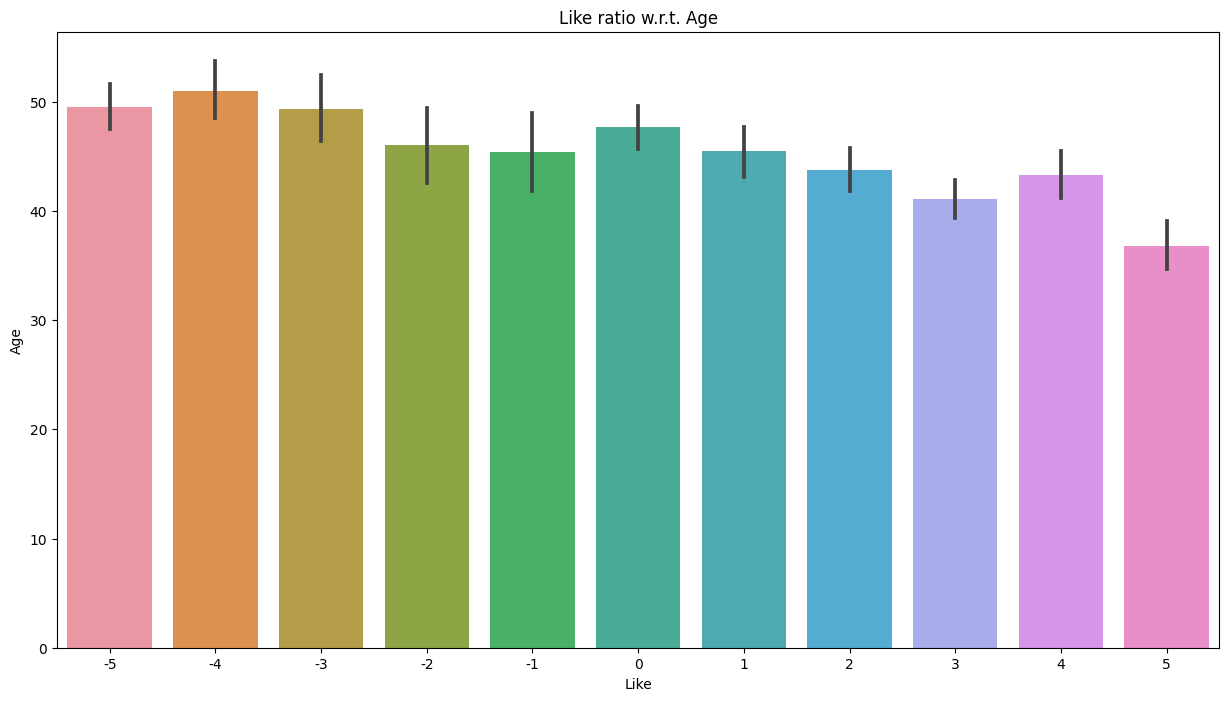

In [30]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Like',y='Age',data=df)
plt.title("Like ratio w.r.t. Age")
plt.show()


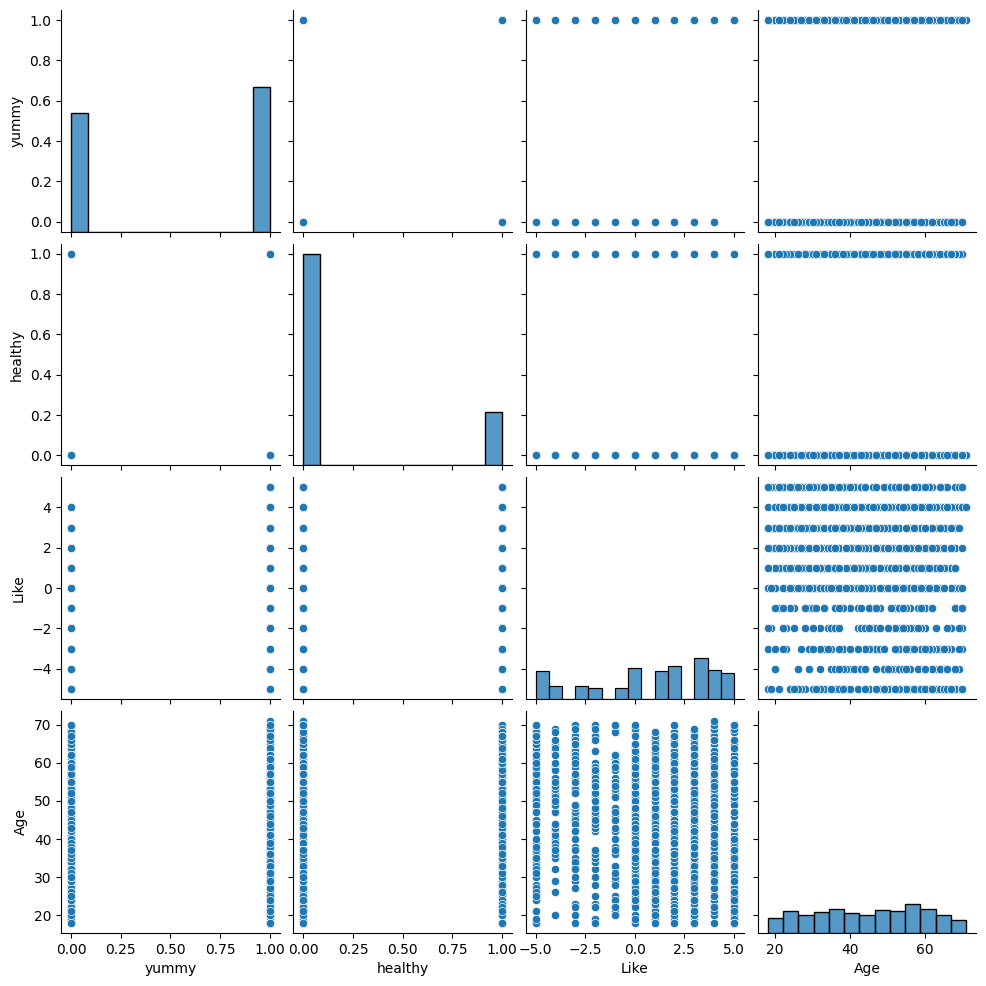

In [31]:
sns.pairplot(df[['yummy', 'healthy', 'VisitFrequency','Like','Age']])
plt.show()

<Figure size 1000x800 with 0 Axes>

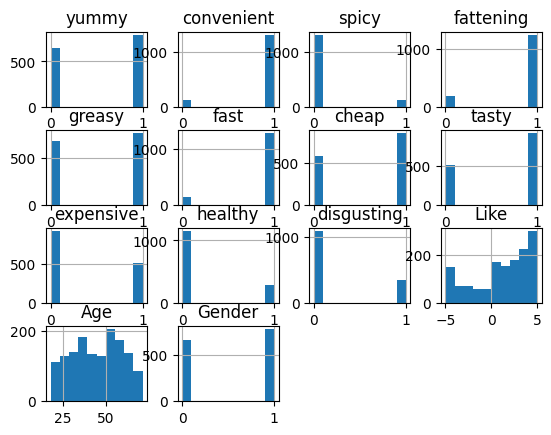

In [32]:
plt.figure(figsize=(10,8)) 
df.hist()
plt.show()

In [33]:
corr_df = df.corr()
corr_df

<ipython-input-33-e9476d57cd4e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Gender
yummy,1.000000,0.251783,0.011014,-0.087096,-0.149501,0.105388,0.105946,0.683329,-0.062656,0.250295,-0.415754,0.680476,-0.276723,0.064713
convenient,0.251783,1.000000,0.029874,0.037141,-0.105675,0.243447,0.152927,0.288270,-0.165618,0.100224,-0.338588,0.364578,-0.067099,0.042257
spicy,0.011014,0.029874,1.000000,-0.040972,0.054126,0.021957,0.019552,0.062931,0.044465,0.105473,0.031801,-0.007810,0.146512,-0.049573
fattening,-0.087096,0.037141,-0.040972,1.000000,0.319529,0.045258,-0.026295,-0.087183,0.089319,-0.331984,0.146833,-0.160301,-0.136318,0.062007
greasy,-0.149501,-0.105675,0.054126,0.319529,1.000000,-0.058437,-0.076774,-0.161251,0.151917,-0.210503,0.321009,-0.255723,-0.230812,-0.021819
fast,0.105388,0.243447,0.021957,0.045258,-0.058437,1.000000,0.251627,0.145512,-0.201183,0.035169,-0.137572,0.168018,-0.019554,0.047506
cheap,0.105946,0.152927,0.019552,-0.026295,-0.076774,0.251627,1.000000,0.142091,-0.718217,0.132001,-0.127146,0.146426,0.017948,0.112432
tasty,0.683329,0.288270,0.062931,-0.087183,-0.161251,0.145512,0.142091,1.000000,-0.107414,0.228226,-0.433350,0.642260,-0.188466,0.047426
expensive,-0.062656,-0.165618,0.044465,0.089319,0.151917,-0.201183,-0.718217,-0.107414,1.000000,-0.070832,0.202451,-0.139950,-0.072344,-0.141240
healthy,0.250295,0.100224,0.105473,-0.331984,-0.210503,0.035169,0.132001,0.228226,-0.070832,1.000000,-0.175380,0.283553,0.016804,0.042606


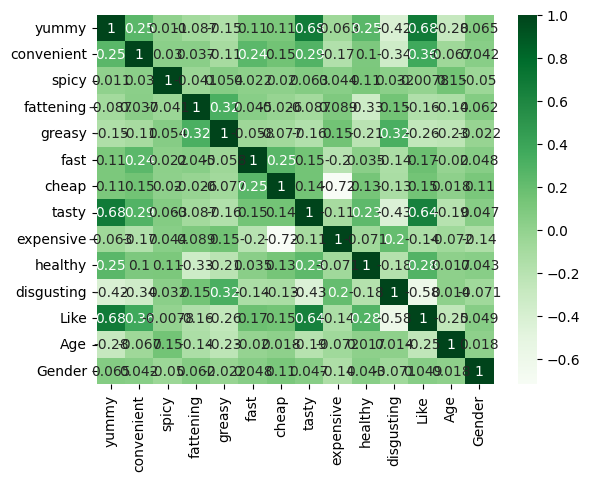

In [34]:
sns.heatmap(corr_df, cmap = "Greens", annot=True)
plt.show()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1431 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1431 non-null   int64 
 1   convenient      1431 non-null   int64 
 2   spicy           1431 non-null   int64 
 3   fattening       1431 non-null   int64 
 4   greasy          1431 non-null   int64 
 5   fast            1431 non-null   int64 
 6   cheap           1431 non-null   int64 
 7   tasty           1431 non-null   int64 
 8   expensive       1431 non-null   int64 
 9   healthy         1431 non-null   int64 
 10  disgusting      1431 non-null   int64 
 11  Like            1431 non-null   int64 
 12  Age             1431 non-null   int64 
 13  VisitFrequency  1431 non-null   object
 14  Gender          1431 non-null   int64 
dtypes: int64(14), object(1)
memory usage: 178.9+ KB


In [36]:
# Considering only first 11 features

df_new = df.loc[:,cols]

In [37]:
df_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


PCA

In [40]:
# converting the dataframe into array

x = df_new.iloc[:,:].values

In [41]:
x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [46]:
from sklearn import preprocessing 
from sklearn.decomposition import PCA

In [47]:
pca_data = preprocessing.scale(x)

pca = PCA(n_components=11)
pc = pca.fit_transform(x)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.419114,-0.231691,0.660553,-0.394399,0.200925,-0.391549,-0.213729,0.167607,0.179510,0.531101,-0.554209
1,-0.220189,0.393341,-0.729516,-0.102505,0.043964,-0.085099,-0.095786,-0.034779,0.110699,0.507822,-0.487602
2,0.371455,0.728362,-0.124168,0.683734,0.849209,-0.677356,0.581753,0.364017,-0.327911,0.050151,0.243132
3,-0.179665,-0.345683,-0.851313,0.204693,-0.680349,-0.036688,-0.056524,-0.232855,-0.024518,-0.247991,-0.056664
4,0.173971,-0.808123,0.016911,0.545781,0.860236,-0.083213,-0.456052,0.164836,-0.073457,0.027998,0.081264
...,...,...,...,...,...,...,...,...,...,...,...
1426,1.547013,0.263928,-0.014192,0.201105,-0.146572,0.309209,-0.076867,0.344021,-0.136215,-0.419146,-0.464879
1427,-0.963333,0.018977,0.298754,0.445180,-0.134964,0.391248,-0.330860,0.870713,-0.305065,-0.240094,-0.197849
1428,-0.182781,1.057798,0.229392,-0.470739,-0.191532,-0.199227,-0.093868,-0.033670,0.039346,0.057964,-0.012160
1429,-1.188787,-0.033521,0.555086,0.696727,0.047700,0.195972,-0.024075,-0.345070,0.023337,-0.000024,-0.107268


In [49]:
std_dev = []
for i in names:
    std_dev.append(np.std(pf[i]))
    
print("Standard Deviation")
np.array(std_dev)

Standard Deviation


array([0.75771158, 0.60650173, 0.50475152, 0.3989886 , 0.33857398,
       0.3119968 , 0.2916587 , 0.27662468, 0.2671078 , 0.25020426,
       0.2382666 ])

In [51]:
#Proportion of Variance (from PC1 to PC11)
pov = pca.explained_variance_ratio_
print("Proportion of Variance")
pov

Proportion of Variance


array([0.29899056, 0.19156392, 0.13267983, 0.08290307, 0.05969759,
       0.05069322, 0.04429957, 0.03985029, 0.03715547, 0.03260161,
       0.02956487])

In [52]:
cp = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Proportion")
cp

Cumulative Proportion


array([0.29899056, 0.49055448, 0.62323431, 0.70613738, 0.76583497,
       0.81652819, 0.86082776, 0.90067805, 0.93783352, 0.97043513,
       1.        ])

In [58]:
# correlation coefficient between original variables and the component

loadings = pca.components_
num_pc = pca.n_features_in_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_new.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.473652,0.370610,-0.301355,0.053818,-0.307839,0.170267,-0.278457,0.012604,0.574230,-0.107604,0.042649
convenient,-0.155302,0.016830,-0.062892,-0.144547,0.276766,-0.343663,-0.060092,-0.108304,-0.015511,-0.652477,-0.561015
spicy,-0.007448,0.019080,-0.039472,0.199271,0.073973,-0.353279,0.707035,0.381458,0.395773,-0.079203,0.140418
fattening,0.116058,-0.034366,-0.322261,-0.349149,-0.069891,-0.403426,-0.392024,0.590763,-0.160342,-0.011932,0.251830
greasy,0.303698,-0.057601,-0.802992,0.245048,0.362733,0.215346,0.038995,-0.141622,-0.002631,0.008337,0.001655
fast,-0.109396,-0.086865,-0.065928,-0.097602,0.112772,-0.598702,-0.085239,-0.625020,0.168059,0.228139,0.342411
cheap,-0.341107,-0.606855,-0.155916,0.123186,-0.127236,-0.101218,-0.040913,0.140513,0.073985,0.441522,-0.477097
tasty,-0.469349,0.312024,-0.285723,-0.006973,-0.211855,-0.079163,0.357405,-0.073368,-0.640410,0.075988,0.022303
expensive,0.333174,0.598525,0.028200,0.068841,-0.000381,-0.262920,-0.067548,0.031604,0.064168,0.466890,-0.477950


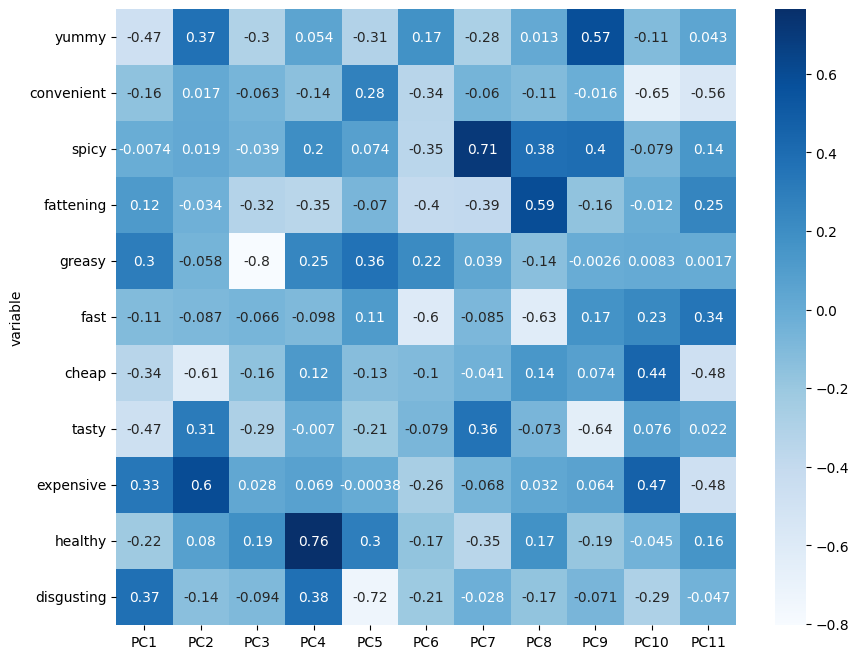

In [63]:
#Correlation matrix plot for loadings 
plt.figure(figsize = (10,8))
sns.heatmap(loadings_df, annot=True, cmap='Blues')
plt.show()

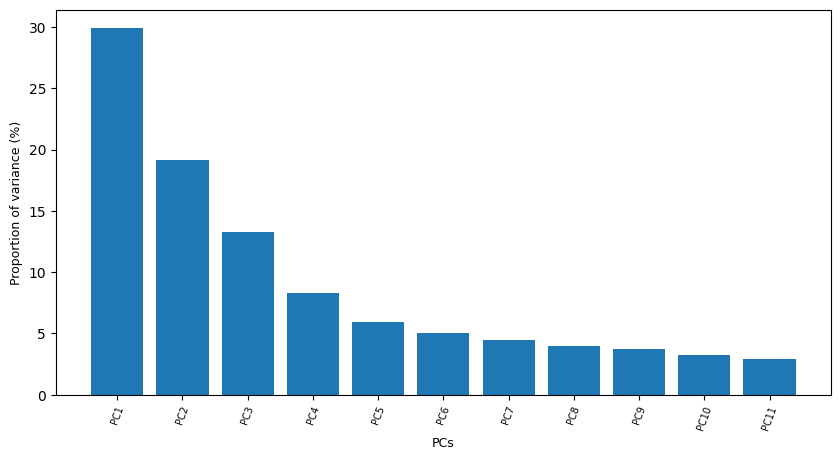

In [66]:
#Scree plot (Elbow test)- PCA
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(10,5))

In [65]:
# !pip install bioinfokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.0/87.0 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.0-py3-none-any.whl size=58662 sha256=2a2b283e2ff137c0805821218880c6d713e0c8bcaae0ac2ac0dd321cd6b555a5
  Stored in directory: /root/.cache/pip/wheels/f8/6e/14/26f84dc04734d9b4614f1a74154aba345568d65c0c145c6543
Successfully built bioinfokit


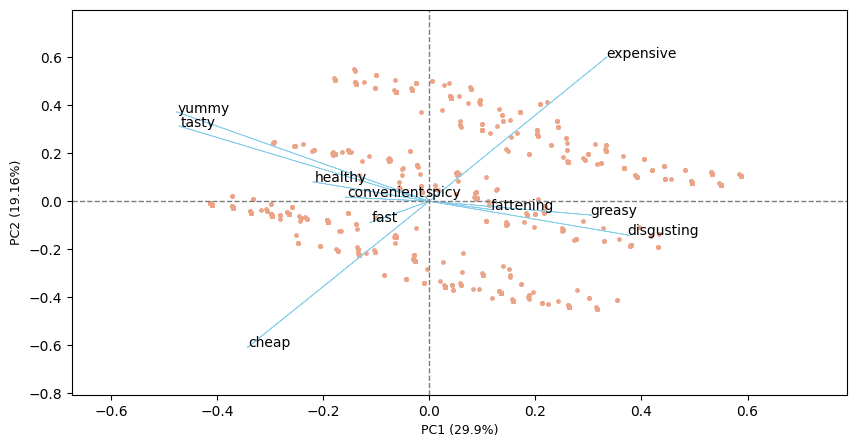

In [67]:
# get PC scores
pca_scores = PCA().fit_transform(x)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

KMeans


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

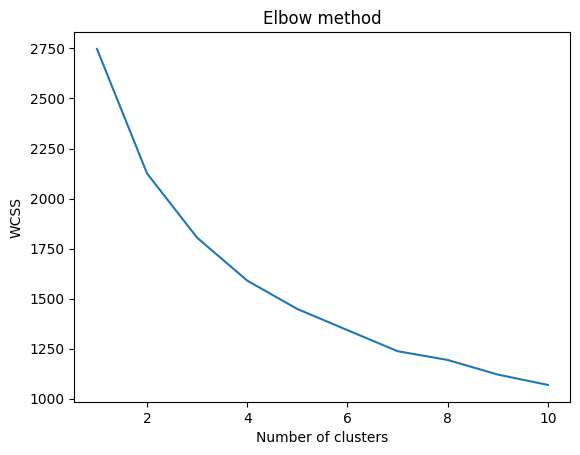

In [68]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(pf)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

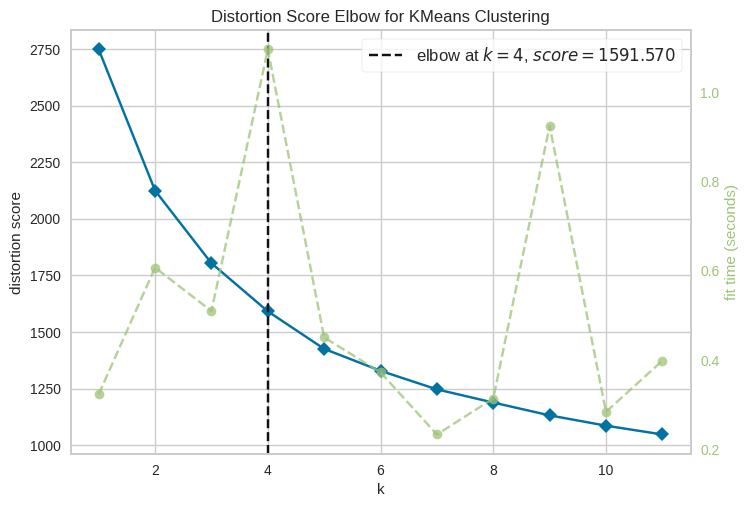

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [70]:
#Extracting segments

#Using k-means clustering analysis
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_new)
visualizer.show()

In [72]:
#K-means clustering 

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_new)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster. 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 3 3 ... 3 1 0]
1589.6420889716358
11
[[0.02083333 0.66666667 0.07083333 0.9125     0.70416667 0.7375
  0.05416667 0.07916667 0.89583333 0.0625     0.7125    ]
 [0.96538462 0.98076923 0.08653846 0.77692308 0.34615385 0.95769231
  0.92115385 0.97307692 0.01923077 0.34423077 0.04807692]
 [0.01928375 0.90909091 0.08539945 0.93112948 0.59779614 0.95592287
  0.89807163 0.29752066 0.02203857 0.07713499 0.33057851]
 [0.88311688 0.96753247 0.13961039 0.90584416 0.61038961 0.85714286
  0.11038961 0.92857143 0.91883117 0.21103896 0.11038961]]


In [73]:
#To see each cluster size
from collections import Counter
Counter(kmeans.labels_)

Counter({2: 363, 3: 308, 1: 520, 0: 240})

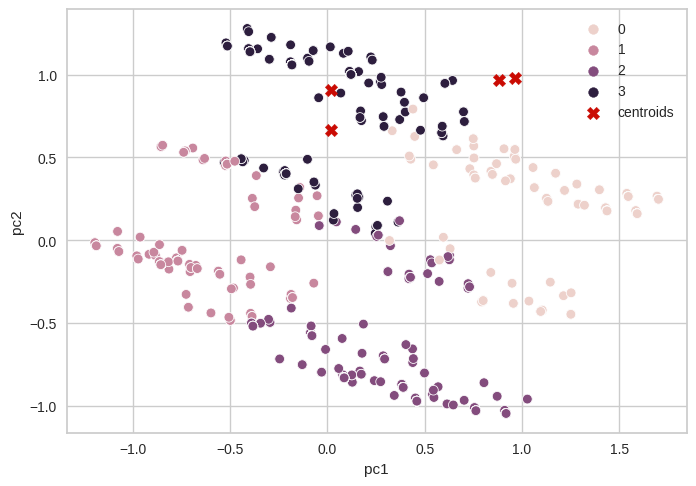

In [74]:
#Visulazing clusters
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [76]:
#DESCRIBING SEGMENTS

from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(df['cluster_num'],df['Like'])


In [77]:
crosstab

Like,-5,-4,-3,-2,-1,0,1,2,3,4,5
cluster_num,,,,,,,,,,,
0,87,28,31,18,12,35,14,7,8,0,0
1,2,3,1,6,10,34,51,76,135,106,96
2,56,37,35,29,30,67,46,43,17,3,0
3,5,2,6,6,6,32,41,54,65,47,44


<Figure size 700x500 with 0 Axes>

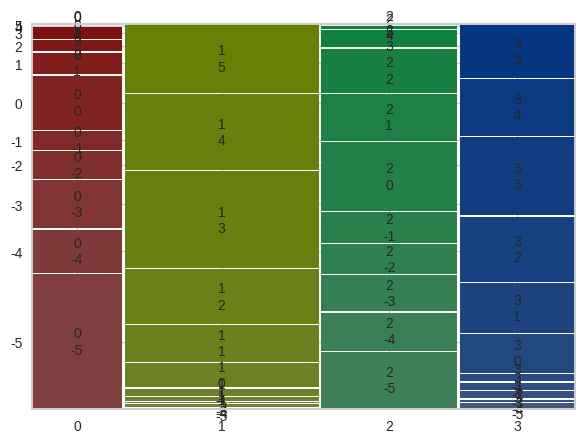

In [79]:
#MOSAIC PLOT
plt.figure(figsize = (7,5))
mosaic(crosstab.stack())
plt.show()

In [80]:
#Mosaic plot gender vs segment
crosstab_gender =pd.crosstab(df['cluster_num'],df['Gender'])
crosstab_gender

Gender,0,1
cluster_num,,
0,138,102
1,205,315
2,154,209
3,162,146


<Figure size 700x500 with 0 Axes>

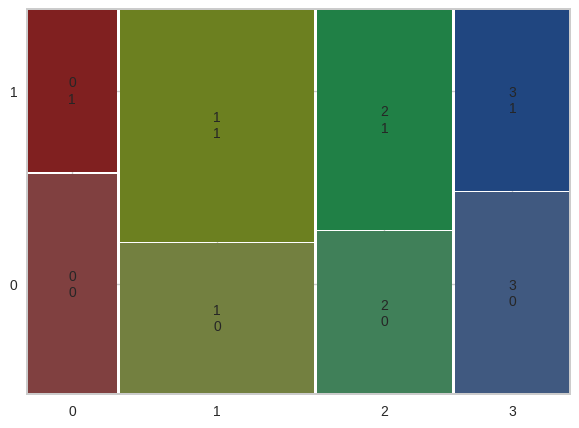

In [81]:
plt.figure(figsize = (7,5))
mosaic(crosstab_gender.stack())
plt.show()

<Axes: xlabel='cluster_num', ylabel='Age'>

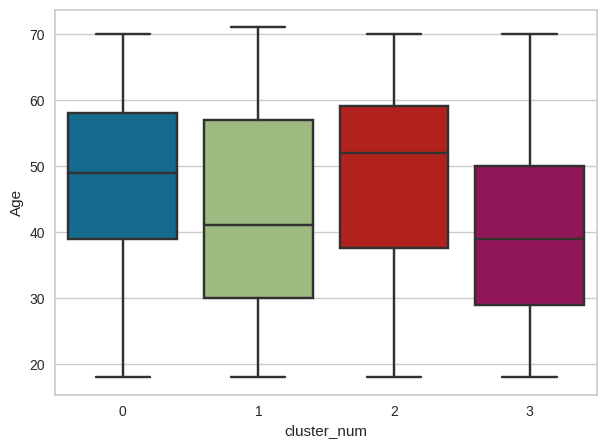

In [82]:
#box plot for age

sns.boxplot(x="cluster_num", y="Age", data=df)

Selecting target segment

In [84]:
#Calculating the mean
#Visit frequency
from sklearn.preprocessing import LabelEncoder
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.712500
1,1,2.596154
2,2,2.732782
3,3,2.548701


In [85]:
#Like
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,2.350000
1,1,7.817308
2,2,3.826446
3,3,7.217532


In [86]:
#Gender
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.425000
1,1,0.605769
2,2,0.575758
3,3,0.474026


In [87]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.425000,2.350000,2.712500
1,1,0.605769,7.817308,2.596154
2,2,0.575758,3.826446,2.732782
3,3,0.474026,7.217532,2.548701


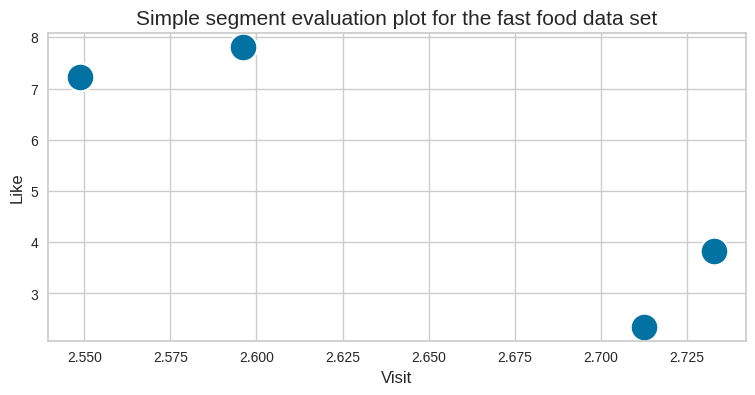

In [88]:
#Target segments

plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="b")
plt.title("Simple segment evaluation plot for the fast food data set",
          fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()